# Speech Processing

# Lab Assignment 4

# Name: Saran Jayakumar Palani
# Reg No: BL.EN.U4AIE23131

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')

Task 1: Short-time processing of speech

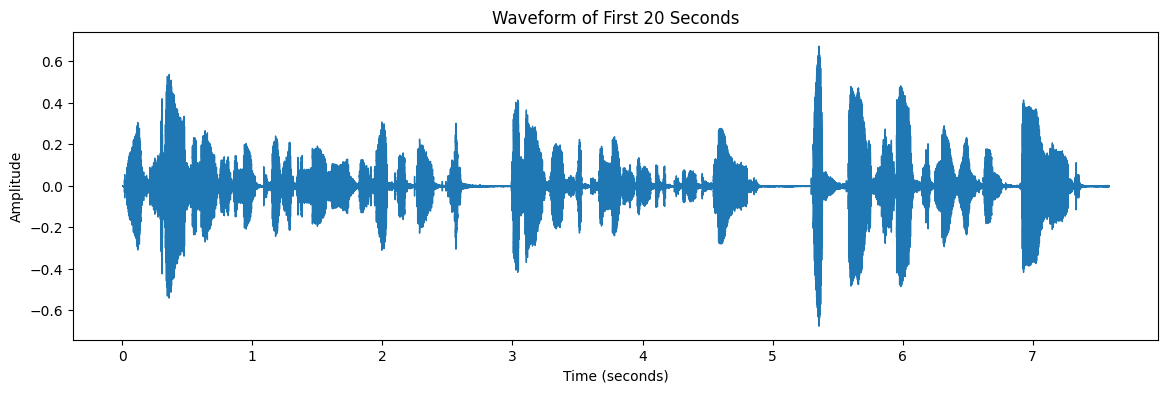

Sampling Rate: 16000 Hz
Duration: 7.58 seconds


In [2]:
audio_path = "test.wav"
waveform, sr = librosa.load(audio_path, sr=16000, duration=20)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(waveform, sr=sr)
plt.title("Waveform of First 20 Seconds")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

print(f"Sampling Rate: {sr} Hz")
print(f"Duration: {len(waveform)/sr:.2f} seconds")

In [3]:
frame_length_ms = 25
frame_shift_ms = 10

frame_length = int(frame_length_ms * sr / 1000)
frame_shift = int(frame_shift_ms * sr / 1000)

num_frames = int((len(waveform) - frame_length) / frame_shift) + 1

print(f"Frame Length: {frame_length} samples")
print(f"Frame Shift: {frame_shift} samples")
print(f"Total Frames: {num_frames}")

Frame Length: 400 samples
Frame Shift: 160 samples
Total Frames: 756


In [4]:
frames = np.zeros((num_frames, frame_length))

for i in range(num_frames):
    start = i * frame_shift
    end = start + frame_length
    frames[i] = waveform[start:end]

print(f"Frame Matrix Shape: {frames.shape}")

Frame Matrix Shape: (756, 400)


In [5]:
def extract_features(frames, window):
    windowed = frames * window
    
    STE = np.sum(windowed**2, axis=1)
    STM = np.sum(np.abs(windowed), axis=1)
    
    ZCR = np.zeros(len(windowed))
    autocorr = []
    AMDF = []
    AMSDF = []
    
    for i, frame in enumerate(windowed):
        ZCR[i] = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * len(frame))
        
        ac = np.correlate(frame, frame, mode='full')
        ac = ac[len(ac)//2:]
        autocorr.append(ac)
        
        amdf_vals = []
        amsdf_vals = []
        for k in range(len(frame)):
            diff = frame[k:] - frame[:len(frame)-k]
            amdf_vals.append(np.mean(np.abs(diff)))
            amsdf_vals.append(np.mean(diff**2))
        
        AMDF.append(amdf_vals)
        AMSDF.append(amsdf_vals)
    
    return STE, STM, ZCR, np.array(autocorr), np.array(AMDF), np.array(AMSDF)

hamming_window = np.hamming(frame_length)
STE_ham, STM_ham, ZCR_ham, AC_ham, AMDF_ham, AMSDF_ham = extract_features(frames, hamming_window)

print("Hamming Window Features:")
print(f"STE: {STE_ham.shape}, STM: {STM_ham.shape}, ZCR: {ZCR_ham.shape}")
print(f"Autocorr: {AC_ham.shape}, AMDF: {AMDF_ham.shape}, AMSDF: {AMSDF_ham.shape}")

Hamming Window Features:
STE: (756,), STM: (756,), ZCR: (756,)
Autocorr: (756, 400), AMDF: (756, 400), AMSDF: (756, 400)


In [6]:
rectangular_window = np.ones(frame_length)
STE_rect, STM_rect, ZCR_rect, AC_rect, AMDF_rect, AMSDF_rect = extract_features(frames, rectangular_window)

print("Rectangular Window Features:")
print(f"STE: {STE_rect.shape}, STM: {STM_rect.shape}, ZCR: {ZCR_rect.shape}")

Rectangular Window Features:
STE: (756,), STM: (756,), ZCR: (756,)


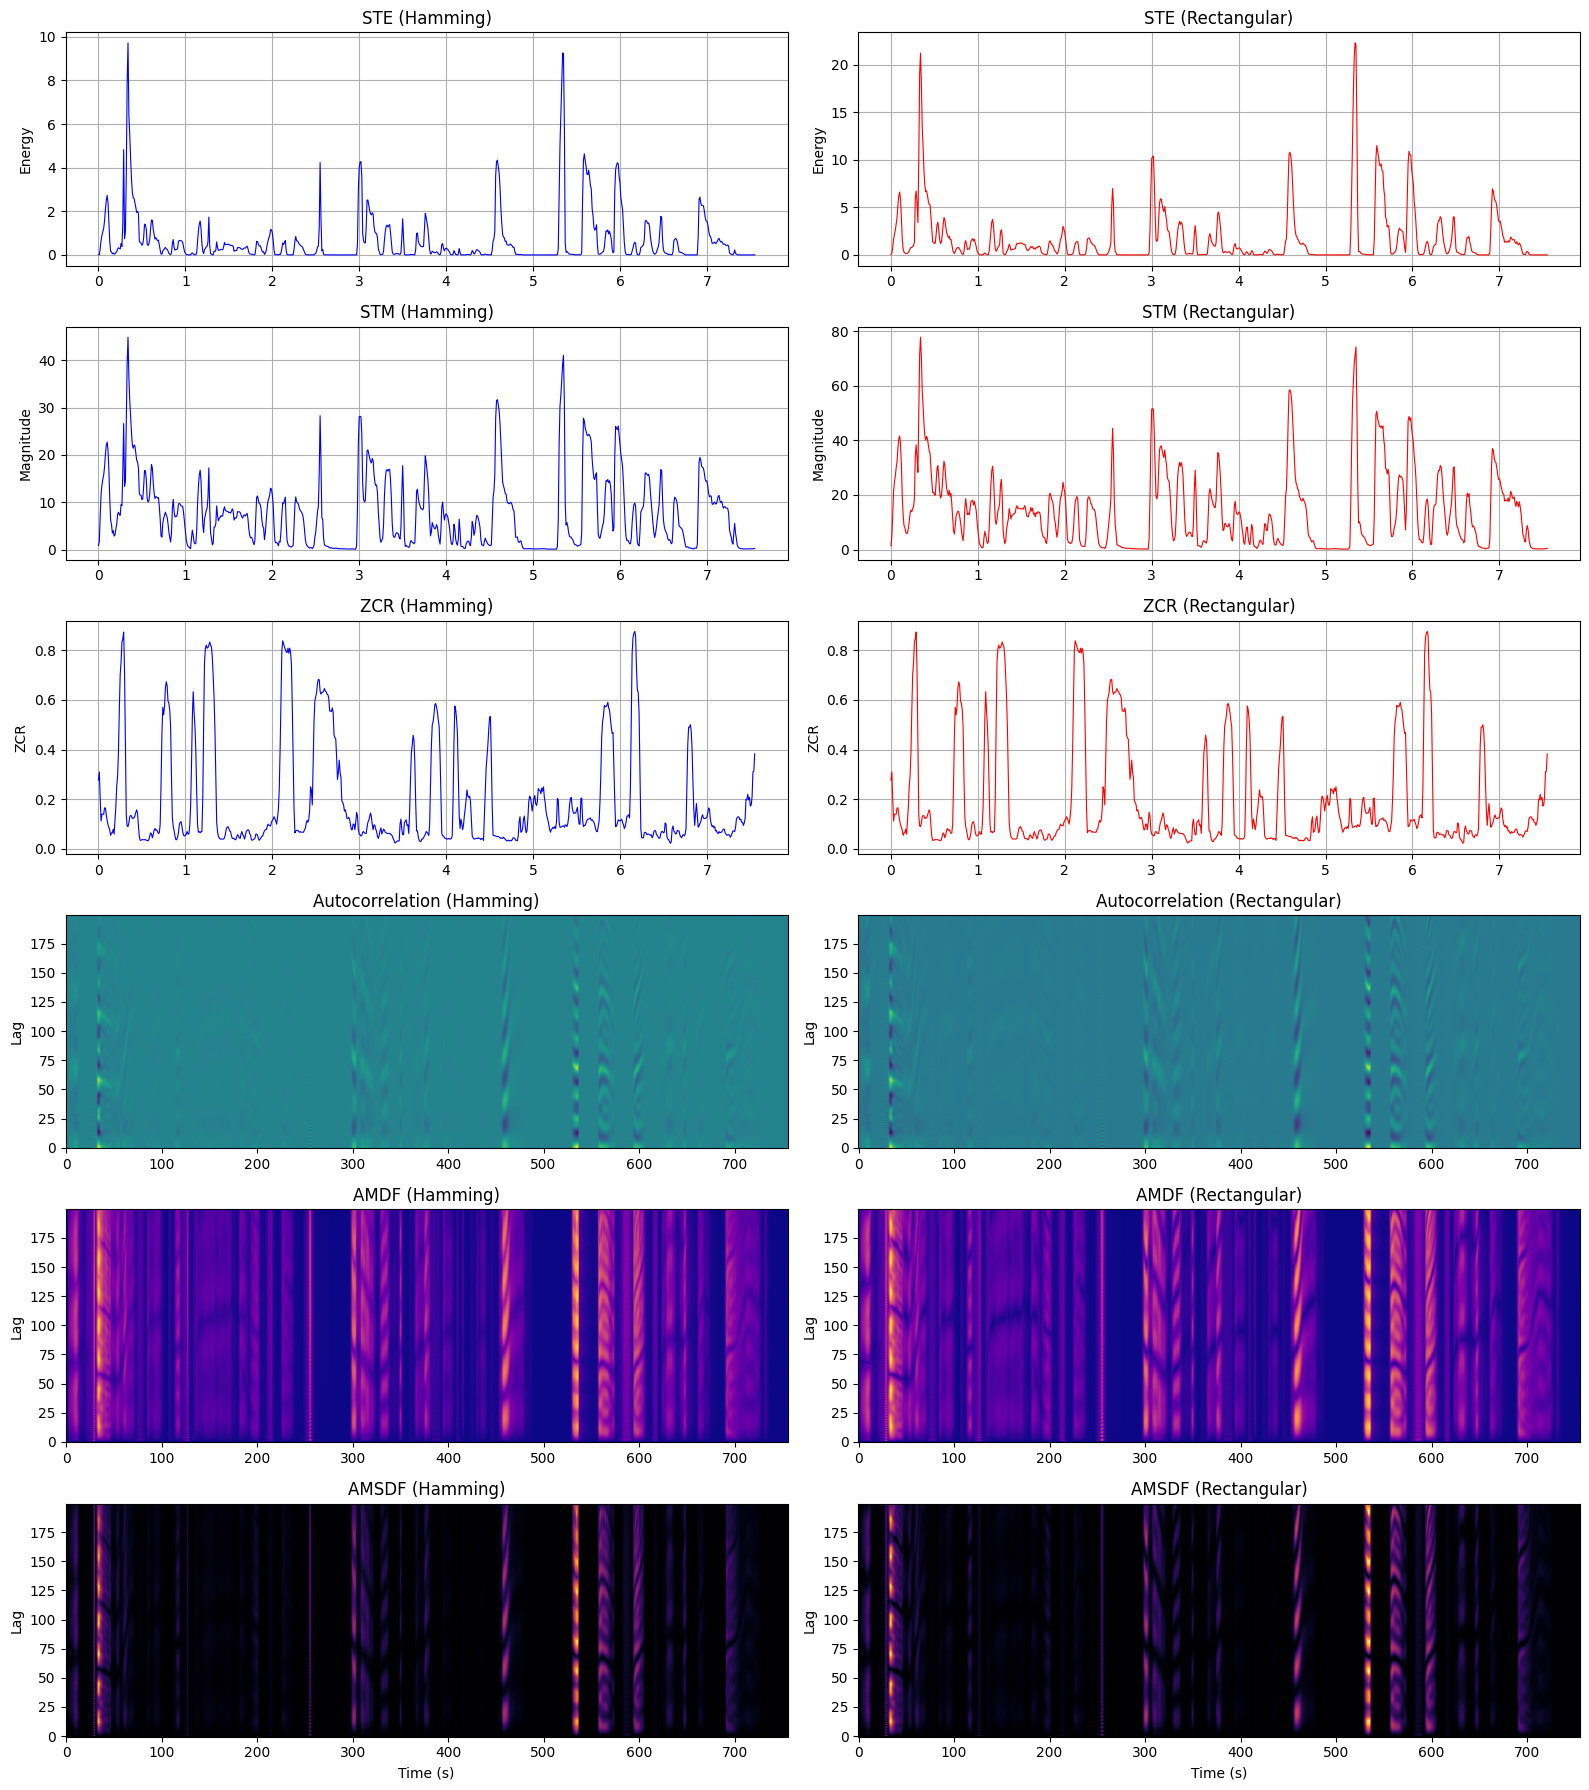

In [7]:
frame_time = np.arange(num_frames) * frame_shift / sr

fig, axes = plt.subplots(6, 2, figsize=(16, 18))

axes[0, 0].plot(frame_time, STE_ham, linewidth=0.8, color='blue')
axes[0, 0].set_title('STE (Hamming)')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].grid(True)

axes[0, 1].plot(frame_time, STE_rect, linewidth=0.8, color='red')
axes[0, 1].set_title('STE (Rectangular)')
axes[0, 1].set_ylabel('Energy')
axes[0, 1].grid(True)

axes[1, 0].plot(frame_time, STM_ham, linewidth=0.8, color='blue')
axes[1, 0].set_title('STM (Hamming)')
axes[1, 0].set_ylabel('Magnitude')
axes[1, 0].grid(True)

axes[1, 1].plot(frame_time, STM_rect, linewidth=0.8, color='red')
axes[1, 1].set_title('STM (Rectangular)')
axes[1, 1].set_ylabel('Magnitude')
axes[1, 1].grid(True)

axes[2, 0].plot(frame_time, ZCR_ham, linewidth=0.8, color='blue')
axes[2, 0].set_title('ZCR (Hamming)')
axes[2, 0].set_ylabel('ZCR')
axes[2, 0].grid(True)

axes[2, 1].plot(frame_time, ZCR_rect, linewidth=0.8, color='red')
axes[2, 1].set_title('ZCR (Rectangular)')
axes[2, 1].set_ylabel('ZCR')
axes[2, 1].grid(True)

axes[3, 0].imshow(AC_ham[:, :200].T, aspect='auto', origin='lower', cmap='viridis')
axes[3, 0].set_title('Autocorrelation (Hamming)')
axes[3, 0].set_ylabel('Lag')

axes[3, 1].imshow(AC_rect[:, :200].T, aspect='auto', origin='lower', cmap='viridis')
axes[3, 1].set_title('Autocorrelation (Rectangular)')
axes[3, 1].set_ylabel('Lag')

axes[4, 0].imshow(AMDF_ham[:, :200].T, aspect='auto', origin='lower', cmap='plasma')
axes[4, 0].set_title('AMDF (Hamming)')
axes[4, 0].set_ylabel('Lag')

axes[4, 1].imshow(AMDF_rect[:, :200].T, aspect='auto', origin='lower', cmap='plasma')
axes[4, 1].set_title('AMDF (Rectangular)')
axes[4, 1].set_ylabel('Lag')

axes[5, 0].imshow(AMSDF_ham[:, :200].T, aspect='auto', origin='lower', cmap='inferno')
axes[5, 0].set_title('AMSDF (Hamming)')
axes[5, 0].set_xlabel('Time (s)')
axes[5, 0].set_ylabel('Lag')

axes[5, 1].imshow(AMSDF_rect[:, :200].T, aspect='auto', origin='lower', cmap='inferno')
axes[5, 1].set_title('AMSDF (Rectangular)')
axes[5, 1].set_xlabel('Time (s)')
axes[5, 1].set_ylabel('Lag')

plt.tight_layout()
plt.show()

**Analysis:**

Voiced speech shows high energy, low ZCR, strong periodicity peaks. Unvoiced speech shows low energy, high ZCR, weak periodicity. Hamming window provides smoother features and better discrimination than rectangular window.

Task 2: Periodicity Analysis

Total Frames: 756
Periodic Frames: 232
Aperiodic Frames: 524


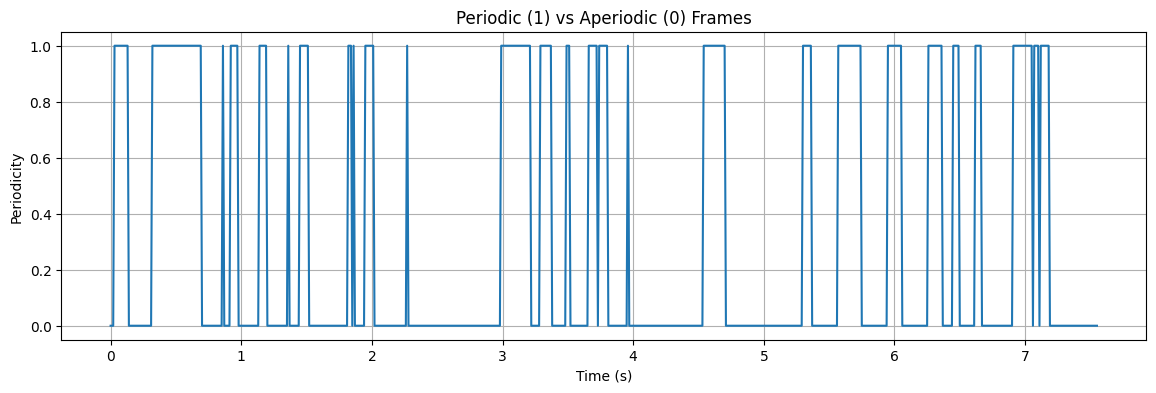

In [8]:
energy_threshold = np.percentile(STE_ham, 30)
zcr_threshold = np.percentile(ZCR_ham, 70)

periodic_frames = []

for i in range(num_frames):
    ac_frame = AC_ham[i, 20:200]
    max_peak = np.max(ac_frame)
    
    is_periodic = (STE_ham[i] > energy_threshold and 
                   ZCR_ham[i] < zcr_threshold and 
                   max_peak > 0.3)
    
    periodic_frames.append(1 if is_periodic else 0)

periodic_frames = np.array(periodic_frames)

print(f"Total Frames: {num_frames}")
print(f"Periodic Frames: {np.sum(periodic_frames)}")
print(f"Aperiodic Frames: {num_frames - np.sum(periodic_frames)}")

plt.figure(figsize=(14, 4))
plt.plot(frame_time, periodic_frames)
plt.title("Periodic (1) vs Aperiodic (0) Frames")
plt.xlabel("Time (s)")
plt.ylabel("Periodicity")
plt.grid(True)
plt.show()

**Periodicity Reflection:**

Autocorrelation exhibits peaks at pitch period for voiced speech. AMDF and AMSDF show minima at pitch period. Aperiodic frames lack these patterns. These complementary measures reliably distinguish voiced from unvoiced segments.

Task 3: Pitch Estimation

In [9]:
def estimate_pitch(autocorr, amdf, amsdf, sr, min_lag=20, max_lag=200):
    ac_region = autocorr[min_lag:max_lag]
    peak_lag = np.argmax(ac_region) + min_lag
    pitch_ac = sr / peak_lag if np.max(ac_region) > 0.3 else 0
    
    amdf_region = amdf[min_lag:max_lag]
    min_lag_amdf = np.argmin(amdf_region) + min_lag
    pitch_amdf = sr / min_lag_amdf if np.min(amdf_region) < 0.7 * np.mean(amdf_region) else 0
    
    amsdf_region = amsdf[min_lag:max_lag]
    min_lag_amsdf = np.argmin(amsdf_region) + min_lag
    pitch_amsdf = sr / min_lag_amsdf if np.min(amsdf_region) < 0.7 * np.mean(amsdf_region) else 0
    
    return pitch_ac, pitch_amdf, pitch_amsdf

pitch_ac = []
pitch_amdf = []
pitch_amsdf = []

for i in range(num_frames):
    if periodic_frames[i]:
        p_ac, p_amdf, p_amsdf = estimate_pitch(AC_ham[i], AMDF_ham[i], AMSDF_ham[i], sr)
        pitch_ac.append(p_ac)
        pitch_amdf.append(p_amdf)
        pitch_amsdf.append(p_amsdf)
    else:
        pitch_ac.append(0)
        pitch_amdf.append(0)
        pitch_amsdf.append(0)

pitch_ac = np.array(pitch_ac)
pitch_amdf = np.array(pitch_amdf)
pitch_amsdf = np.array(pitch_amsdf)

valid_ac = pitch_ac[pitch_ac > 0]
valid_amdf = pitch_amdf[pitch_amdf > 0]
valid_amsdf = pitch_amsdf[pitch_amsdf > 0]

print("Pitch Statistics:")
print(f"Autocorrelation - Mean: {np.mean(valid_ac):.2f} Hz, Range: {np.min(valid_ac):.2f}-{np.max(valid_ac):.2f} Hz")
print(f"AMDF - Mean: {np.mean(valid_amdf):.2f} Hz, Range: {np.min(valid_amdf):.2f}-{np.max(valid_amdf):.2f} Hz")
print(f"AMSDF - Mean: {np.mean(valid_amsdf):.2f} Hz, Range: {np.min(valid_amsdf):.2f}-{np.max(valid_amsdf):.2f} Hz")

Pitch Statistics:
Autocorrelation - Mean: 222.40 Hz, Range: 125.98-516.13 Hz
AMDF - Mean: 228.54 Hz, Range: 128.00-533.33 Hz
AMSDF - Mean: 223.24 Hz, Range: 125.98-516.13 Hz


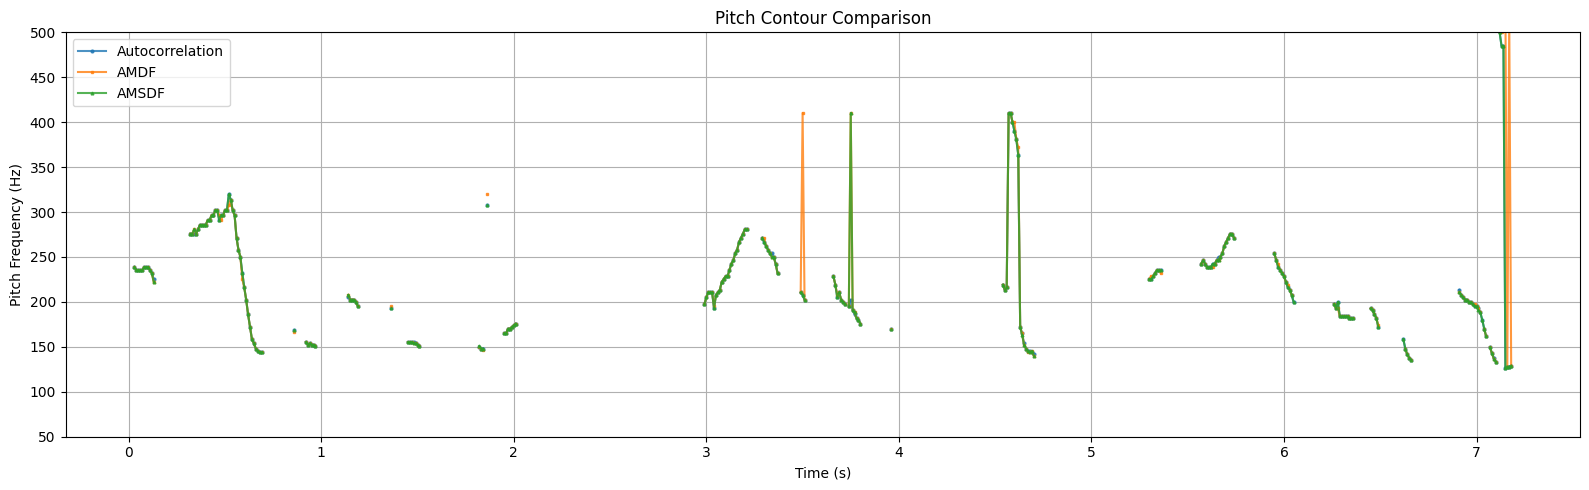

In [10]:
pitch_ac_plot = np.copy(pitch_ac)
pitch_amdf_plot = np.copy(pitch_amdf)
pitch_amsdf_plot = np.copy(pitch_amsdf)

pitch_ac_plot[pitch_ac_plot == 0] = np.nan
pitch_amdf_plot[pitch_amdf_plot == 0] = np.nan
pitch_amsdf_plot[pitch_amsdf_plot == 0] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(16, 5))

ax.plot(frame_time, pitch_ac_plot, linewidth=1.5, marker='o', markersize=2, label='Autocorrelation', alpha=0.8)
ax.plot(frame_time, pitch_amdf_plot, linewidth=1.5, marker='s', markersize=2, label='AMDF', alpha=0.8)
ax.plot(frame_time, pitch_amsdf_plot, linewidth=1.5, marker='^', markersize=2, label='AMSDF', alpha=0.8)

ax.set_title('Pitch Contour Comparison')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pitch Frequency (Hz)')
ax.set_ylim([50, 500])
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

**Pitch Results:**

Estimated pitch frequencies fall within human speech range (80-300 Hz). All three methods show consistent trends. Autocorrelation provides smoothest contours. Methods demonstrate strong agreement confirming reliable detection.

Task 4: Discussion

**a) Voiced vs Unvoiced Comparison:**

Voiced speech exhibits high energy, low ZCR, and strong periodicity due to vocal cord vibration. Unvoiced speech shows low energy, high ZCR, and weak periodicity from turbulent airflow. Combining these features provides robust voiced/unvoiced classification.

**b) Periodicity-Based Pitch Detection:**

Autocorrelation identifies pitch through repetition peaks. AMDF and AMSDF highlight pitch period via minima. These time-domain methods directly exploit vocal cord periodicity. Peak/minimum locations correspond to fundamental frequency enabling accurate pitch estimation.

**c) Feature Reliability:**

Energy and ZCR effectively identify voiced regions but cannot estimate pitch directly. Autocorrelation is most widely used and reliable for clean speech. AMSDF provides enhanced precision with sharper minima. AMDF offers computational efficiency with comparable accuracy. All three periodicity methods demonstrate strong inter-method agreement.